## Import packages

In [28]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

#Import packages for statistical test
from scipy import stats

# Packages for Logistic Regression modeling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression


# Import packages for data modeling
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them.
import pickle

In [2]:
# Import dataset
df0 = pd.read_csv('waze_dataset.csv')

## EDA (exploratory data analysis)

In [3]:
# Copy the df0 dataframe
df = df0.copy()

In [4]:
# Inspect the first five rows
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [5]:
# Get size/ shape of the dataset
df.shape

(14999, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [7]:
#Get descriptive statistics of the dataset
df.describe(include='all')

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
count,14999.000000,14299,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,retained,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,iPhone
freq,NaN,11763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9672
mean,7499.000000,NaN,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,NaN
std,4329.982679,NaN,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,NaN
min,0.000000,NaN,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,NaN
25%,3749.500000,NaN,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,NaN
50%,7499.000000,NaN,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,NaN
75%,11248.500000,NaN,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,NaN


## Visualizations

While tree-based models are resilient to outliers, regression model tends to be easily impacted by outliers. Data visualization will make it easier to detect the existence of outliers.

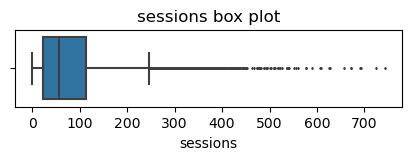

In [8]:
# Box plot for 'sessions'
plt.figure(figsize=(5,1))
sns.boxplot(x=df['sessions'], fliersize=1)
plt.title('sessions box plot');

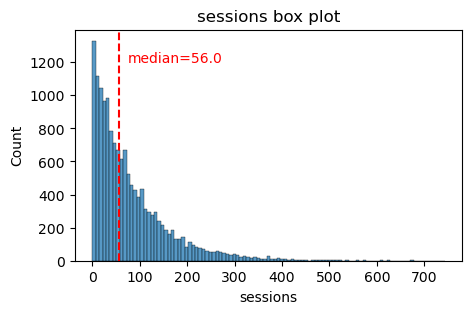

In [9]:
# Histogram for 'sessions'
plt.figure(figsize=(5,3))
sns.histplot(x=df['sessions'])
median = df['sessions'].median()
plt.axvline(median, color='red', linestyle='--')
plt.text(75,1200, 'median=56.0', color='red')
plt.title('sessions box plot');

In [10]:
# Helper function to plot histograms based on the
# format of the `sessions` histogram since it is a repetitive
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
                                                             # from the sns.histplot() function
    median=round(df[column_str].median(), 1)
    plt.figure(figsize=(5,3))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line
    if median_text==True:                                    # Add median text unless set to False
        ax.text(0.25, 0.85, f'median={median}', color='red',
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    plt.title(f'{column_str} histogram');

In [11]:
#Helper function to plot box plot
def boxplotter(column_str):
    plt.figure(figsize=(5,1))
    sns.boxplot(x=df[column_str],
               fliersize=1)


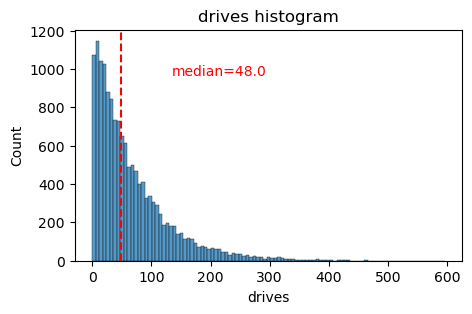

In [12]:
# Histogram for 'drives'
histogrammer('drives')

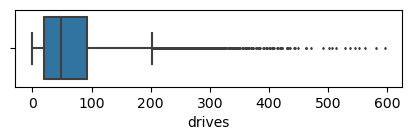

In [13]:
#Bot plot for 'drives'
boxplotter('drives')

For efficiency of demonstration, plotting for the other columns are skipped here in the code. All numerical columns were, however, explored during the project.

Notice 'device' and 'label' is categorical variable, so instead of box plot, pie chart is applied for these two columns.

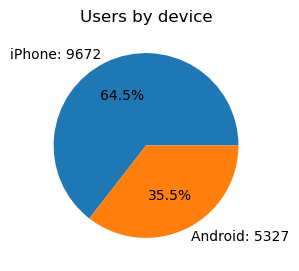

In [14]:
# Pie chart for 'device'
fig = plt.figure(figsize=(3,3))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Users by device');

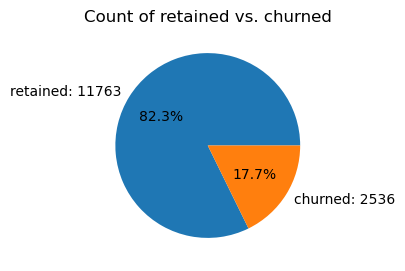

In [15]:
# Pie chart for 'label'
fig = plt.figure(figsize=(3,3))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Count of retained vs. churned');

Next, understand how each columns are related.

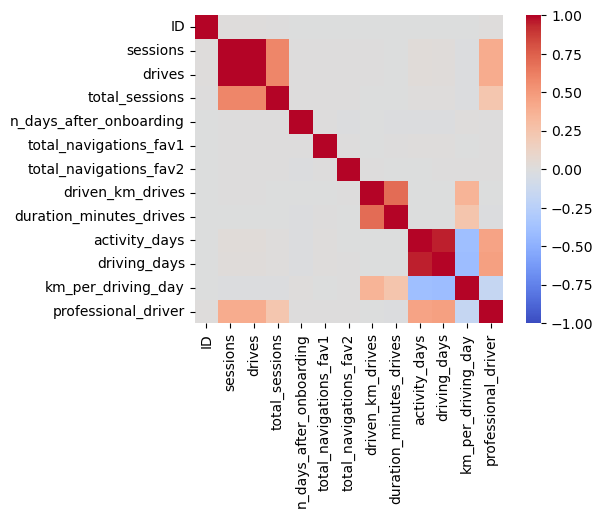

In [41]:
f, ax = plt.subplots(figsize=(6, 4))
df_corr = df.drop(columns=['device', 'label'])
corr = df_corr.corr()
sns.heatmap(corr,
    cmap='coolwarm',
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax);

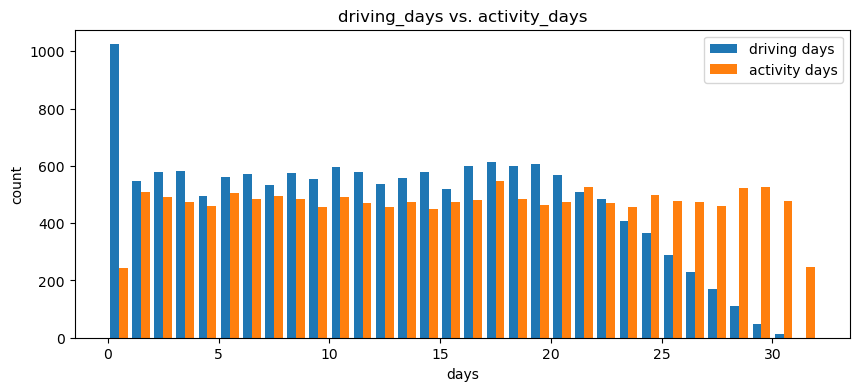

In [17]:
# Histogram to compare 'driving_days' vs. 'activity_days'
plt.figure(figsize=(10,4))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label)
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.title('driving_days vs. activity_days');

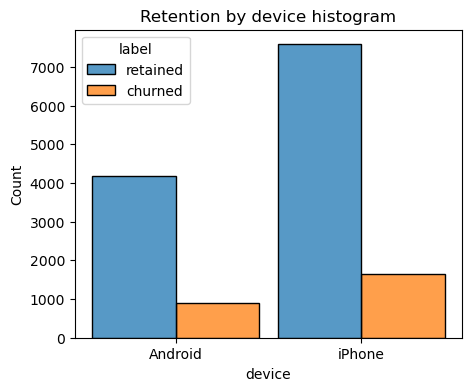

In [18]:
# Histogram to check the relation between device type and retention/churn
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             multiple='dodge',
             shrink=0.9
             )
plt.title('Retention by device histogram');

In [19]:
# Examine the retention/ churn by kilometers driven per driving day
# 1. Create `km_per_driving_day` column
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']

# 2. Call `describe()` on the new column
df['km_per_driving_day'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_per_driving_day, dtype: float64

In [20]:
# 1. Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# 2. Confirm that it worked
df['km_per_driving_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_per_driving_day, dtype: float64

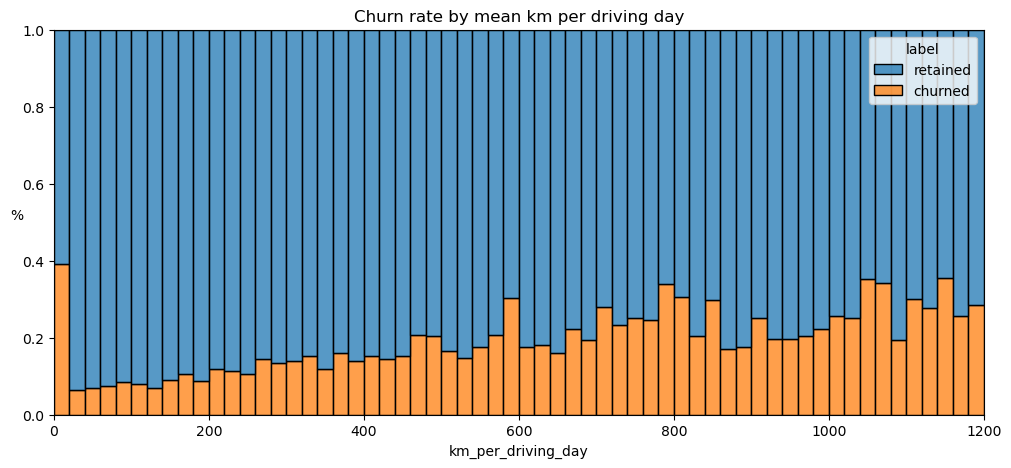

In [21]:
# Histogram of churn rate by mean km per driving day
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='km_per_driving_day',
             bins=range(0,1201,20),
             hue='label',
             multiple='fill')
plt.ylabel('%', rotation=0)
plt.title('Churn rate by mean km per driving day');

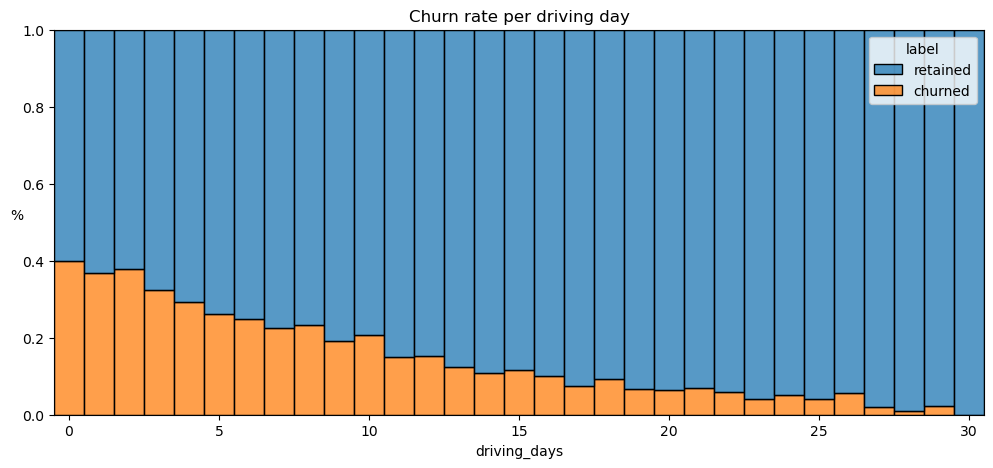

In [22]:
# Histogram of churn rate per driving day
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

From the chart retention by devices above we can see three is no significant difference of churn rate between iPhone and Android users.

Let's conduct statistical test to check if there is difference for number of drives between drives with iPhone and Android devices.


**Hypotheses:**

$H_0$: There is no difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.

$H_A$: There is a difference in average number of drives between drivers who use iPhone devices and drivers who use Androids.


In [26]:
# 1. Isolate the `drives` column for iPhone users.
iPhone = df[df['device'] == 'iPhone']['drives']

# 2. Isolate the `drives` column for Android users.
Android = df[df['device'] == 'Android']['drives']

# 3. Perform the t-test
stats.ttest_ind(a=iPhone, b=Android, equal_var=False)

Ttest_indResult(statistic=1.463523206885235, pvalue=0.143351972680206)

We use the conventional 5% as significance level. Since the p-value is larger than the chosen significance level, we failed to reject null hypothesis and conclude thre is not a statistically significant difference in the average number of drives between drivers who use iPhone and drivers who use Androids

## Regression model

**Create feature/ feature engineering**

We have created the feature `km_per_driving_day` previously, now let's create more features.

#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

In [31]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)

In [32]:
# 1. Check count of professionals and non-professionals
print(df['professional_driver'].value_counts())

# 2. Check in-class churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

0    12405
1     2594
Name: professional_driver, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: label, dtype: float64

**Drop missing values**

Drop missing values in `label` column

In [34]:
# Operate on a copy so df can still be used later directly
df_reg = df.copy()
df_reg = df_reg.dropna(subset=['label'])

**Impute outliers**

From visualization step we know for many columns there are outliers, which could distort the regression result. Replace them with 95th percentile value.

In [35]:
# Impute outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df_reg[column].quantile(0.95)
    df_reg.loc[df_reg[column] > threshold, column] = threshold

df_reg.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,581.942399,0.173998
std,4331.207621,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,1038.254509,0.379121
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,136.168003,0.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,273.301012,0.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,558.018761,0.000000
max,14998.000000,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,15420.234110,1.000000


**Encode categorical variables**

In [36]:
# Create binary `label2` column in order to perform logistic regression

df_reg['label2'] = np.where(df_reg['label']=='churned', 1, 0)
df_reg[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


**Collinearity**

Check collinearity among predictor variables

In [37]:
# Generate a correlation matrix
df_reg.corr(method='pearson')

C:\Users\PengWang\AppData\Local\Temp\ipykernel_6396\2336597940.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_reg.corr(method='pearson')


,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2
ID,1.000000,0.011611,0.010749,0.005552,-0.005300,0.000606,-0.003195,0.000466,0.001909,-0.000891,-0.000981,-0.005151,0.012436,0.004425
sessions,0.011611,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.011569,0.443654,0.034911
drives,0.010749,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.010989,0.444425,0.035865
total_sessions,0.005552,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.016167,0.254433,0.024568
n_days_after_onboarding,-0.005300,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011764,0.003770,-0.129263
total_navigations_fav1,0.000606,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,-0.000197,-0.000224,0.052322
total_navigations_fav2,-0.003195,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.006751,0.007126,0.015032
driven_km_drives,0.000466,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.344811,-0.000904,0.019767
duration_minutes_drives,0.001909,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.239627,-0.012128,0.040407
activity_days,-0.000891,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.397433,0.453825,-0.303851


C:\Users\PengWang\AppData\Local\Temp\ipykernel_6396\3254720243.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_reg.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')


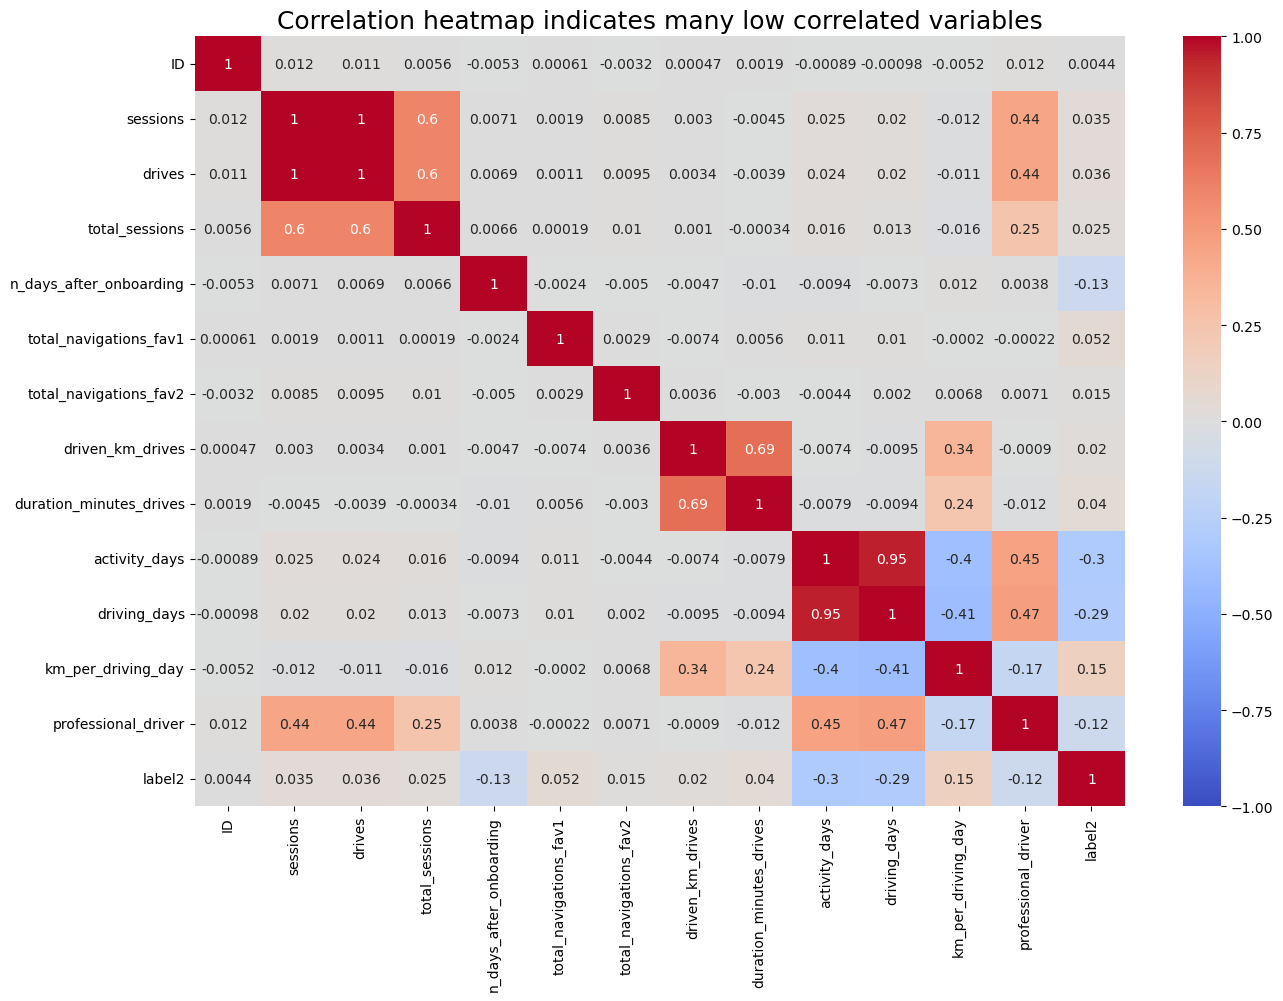

In [38]:
# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_reg.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show();

Notice `sessions` and `drives` as well as `driving_days` and `activity_days` are highly correlated

**Create dummies**

In [43]:
# Create new `device2` variable
df_reg['device2'] = np.where(df_reg['device']=='Android', 0, 1)
df_reg[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


### **Model building**

**Assign predictor variables and target**

In [44]:
# Isolate predictor variables
X = df_reg.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'])

In [46]:
# Isolate target variable
y = df_reg['label2']

 **Split the data**

In [47]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [52]:
model = LogisticRegression(penalty=None, max_iter=400)

model.fit(X_train, y_train)



LogisticRegression(max_iter=400, penalty=None)

In [53]:
##check coefficients of each variable
pd.Series(model.coef_[0], index=X.columns)

ID                         0.000003
drives                     0.001902
total_sessions             0.000311
n_days_after_onboarding   -0.000409
total_navigations_fav1     0.001220
total_navigations_fav2     0.000900
driven_km_drives          -0.000016
duration_minutes_drives    0.000109
activity_days             -0.106345
km_per_driving_day         0.000018
professional_driver       -0.001603
device2                   -0.000884
dtype: float64

In [54]:
#check intercept of the model
model.intercept_

array([-0.00144485])

In [55]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.9417221 , 0.0582779 ],
       [0.61470707, 0.38529293],
       [0.7632261 , 0.2367739 ],
       ...,
       [0.92036872, 0.07963128],
       [0.85293031, 0.14706969],
       [0.93501134, 0.06498866]])

In [56]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

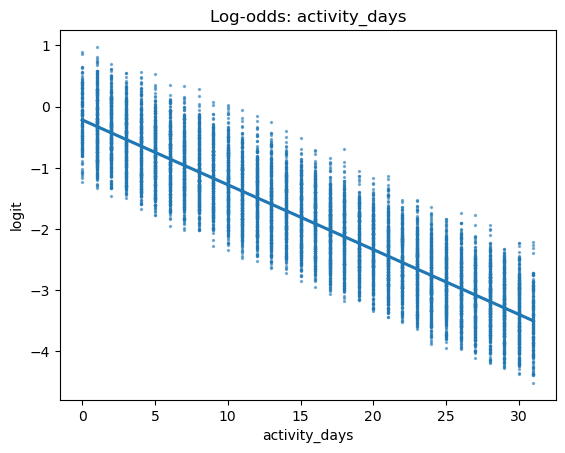

In [57]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

### **Model results evaluation**

In [59]:
# Generate predictions on X_test
y_preds = model.predict(X_test)

# Score the model (accuracy) on the test data
model.score(X_test, y_test)

0.8237762237762237

**Show results with a confusion matrix**

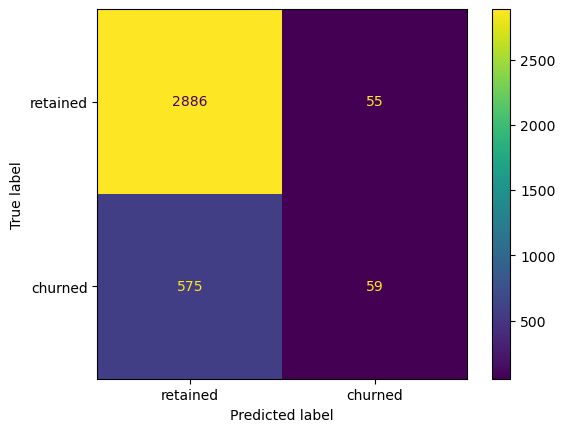

In [60]:
cm = confusion_matrix(y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['retained', 'churned'],
                              )
disp.plot();

In [61]:
# Create a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.52      0.09      0.16       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



**Plot feature importance**

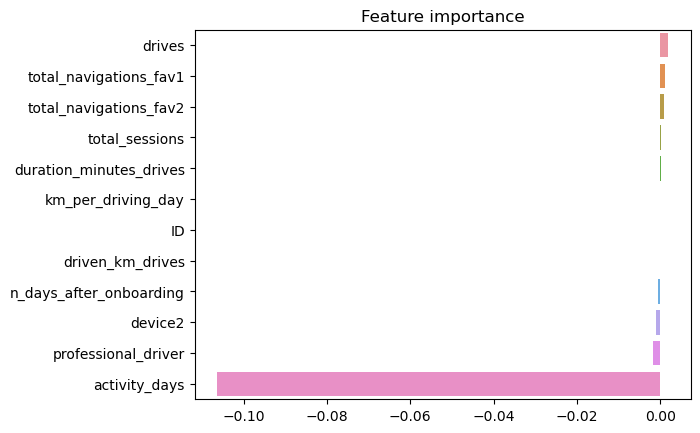

In [62]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

## Machine learning model

**Feature engineering**

Create more features apart from `km_per_driving_day` and `professional_driver`

#### **`percent_sessions_in_last_month`**

Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.


In [63]:
# 1. Create `percent_sessions_in_last_month` feature
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

# 2. Get descriptive stats
df['percent_sessions_in_last_month'].describe()

count    14999.000000
mean         0.449255
std          0.286919
min          0.000000
25%          0.196221
50%          0.423097
75%          0.687216
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

#### **`total_sessions_per_day`**

Create a new column that represents the mean number of sessions per day _since onboarding_.

In [64]:
# Create `total_sessions_per_day` feature
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']

#### **`km_per_hour`**

Create a column representing the mean kilometers per hour driven in the last month.

In [65]:
# Create `km_per_hour` feature
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)
df['km_per_hour'].describe()

count    14999.000000
mean       190.394608
std        334.674026
min         72.013095
25%         90.706222
50%        122.382022
75%        193.130119
max      23642.920871
Name: km_per_hour, dtype: float64

#### **`km_per_drive`**

Create a column representing the mean number of kilometers per drive made in the last month for each user.


In [67]:
# Create `km_per_drive` feature
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df['km_per_drive'].describe()

count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64

In [68]:
# 1. Convert infinite values to zero
df.loc[df['km_per_drive']==np.inf, 'km_per_drive'] = 0

# 2. Confirm that it worked
df['km_per_drive'].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

#### **`percent_of_sessions_to_favorite`**

Create a new column that represents the percentage of total sessions that were used to navigate to one of the users' favorite places.

In [69]:
# Create `percent_of_sessions_to_favorite` feature
df['percent_of_drives_to_favorite'] = (
    df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']

# Get descriptive stats
df['percent_of_drives_to_favorite'].describe()

count    14999.000000
mean         1.665439
std          8.865666
min          0.000000
25%          0.203471
50%          0.649818
75%          1.638526
max        777.563629
Name: percent_of_drives_to_favorite, dtype: float64

**Drop missing values**

In [70]:
# Drop rows with missing values
df = df.dropna(subset=['label'])

**Outliers**

Many columns have outliers. However, tree-based models are resilient to outliers, so there is no need to make any imputations.

**Dummying features and encoding target**

In [76]:
# Create new `device2` variable
df['device2'] = np.where(df['device']=='Android', 0, 1)

C:\Users\PengWang\AppData\Local\Temp\ipykernel_6396\1722960236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['device2'] = np.where(df['device']=='Android', 0, 1)


,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,km_per_driving_day,professional_driver,device2,percent_sessions_in_last_month,total_sessions_per_day,km_per_hour,km_per_drive,percent_of_drives_to_favorite,label2
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,138.360267,1,0,0.953670,0.130381,79.430298,11.632058,0.700931,0
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1246.901868,0,1,0.406856,0.266854,260.389902,128.186173,0.253903,0
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,382.393602,0,0,0.841186,0.051121,113.953460,32.201567,0.000000,0
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,304.530374,0,1,0.724968,4.505948,93.351141,22.839778,4.867640,0
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,219.455667,1,0,0.499266,0.107713,194.342970,58.091206,1.016363,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone,170.029229,0,1,0.288634,1.484826,79.330952,52.554489,1.524950,0
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android,203.128760,0,0,0.223797,0.074918,201.686167,116.073577,0.133212,0
14996,14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,182.225002,1,1,0.646893,0.225316,180.232076,14.145320,0.040283,0
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone,675.293092,0,1,0.825374,0.057309,956.401322,33.764655,0.249274,1


In [72]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)

C:\Users\PengWang\AppData\Local\Temp\ipykernel_6396\3602908123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label2'] = np.where(df['label']=='churned', 1, 0)


In [77]:
# Drop `ID` column
df = df.drop(['ID'], axis=1)

**Evaluating class balance of target variable**

In [78]:
# Get class balance of 'label' col
df['label'].value_counts(normalize=True)

retained    0.822645
churned     0.177355
Name: label, dtype: float64

### **Model building**

**Split the data**

Split the data into train/validation/test sets (60/20/20)

In [79]:
# 1. Isolate X variables
X = df.drop(columns=['label', 'label2', 'device'])

# 2. Isolate y variable
y = df['label2']

# 3. Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y,
                                              test_size=0.2, random_state=42)

# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr,
                                                  test_size=0.25, random_state=42)

In [80]:
for x in [X_train, X_val, X_test]:
    print(len(x))

8579
2860
2860


**1. Decision tree**

In [89]:
#1. Instantiate the decision tree classifier
tree = DecisionTreeClassifier(random_state=42)

#2. Create a dictionary of hyperparameters to tune
tree_para = {'max_depth': [4,6,8,12,None],
             'min_samples_leaf':[2,5,1],
             'min_samples_split':[2,4,6]
            }
# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# 4. Instantiate the GridSearchCV object
tree_cv = GridSearchCV(tree, tree_para, scoring=scoring, cv=4, refit='recall')

In [90]:
#Fit the model to data
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [4, 6, 8, 12, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='recall',
             scoring={'precision', 'recall', 'roc_auc', 'accuracy', 'f1'})

In [91]:
print(tree_cv.best_score_)
print(tree_cv.best_params_)

0.30355539439149054
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [92]:
#define a function to retrieve results for comparison/ reference later
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy',
                   }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          },
                         )

    return table

In [93]:
tree_cv_results = make_results('Decision tree cv', tree_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.45965,0.124152,0.195405,0.818976


#### **2. Random forest**

In [81]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [1.0],
             'min_samples_leaf': [1, 2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

In [82]:
# Fit model to training data
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring={'precision', 'accuracy', 'recall', 'f1'})

In [83]:
# Examine best score
rf_cv.best_score_

0.12415216190081504

Note the recall score is better than logistic regression model (0.09)

In [84]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [94]:
RF_cv_results = make_results('RF cv', rf_cv, 'recall')
results = pd.concat([tree_cv_results, RF_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Decision tree cv,0.281953,0.303555,0.292010,0.738666
0,RF cv,0.459650,0.124152,0.195405,0.818976


**3. XGBoost**

In [95]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [6, 12, None],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [96]:
##Fit model to data
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [6, 12, None], 'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring={'precision', 'accuracy', 'recall', 'f1'})

In [97]:
# Examine best score
xgb_cv.best_score_

0.18200891007045172

In [98]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 3,
 'n_estimators': 500}

In [99]:
# Call 'make_results()' on the GridSearch object
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,Decision tree cv,0.281953,0.303555,0.292010,0.738666
0,RF cv,0.459650,0.124152,0.195405,0.818976
0,XGB cv,0.420869,0.182009,0.254104,0.810468


### **Model selection**

**1. Decision tree**

In [101]:
# Use decision tree model to predict on validation data
tree_val_preds = tree_cv.best_estimator_.predict(X_val)

In [102]:
#Define a function to retrieve best score for comparison later
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [103]:
# Get validation scores for decision tree model
tree_val_scores = get_test_scores('Decision tree val', tree_val_preds, y_val)

In [104]:
# Append to the results table
results = pd.concat([results, tree_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Decision tree cv,0.281953,0.303555,0.292010,0.738666
0,RF cv,0.459650,0.124152,0.195405,0.818976
0,XGB cv,0.420869,0.182009,0.254104,0.810468
0,Decision tree val,0.267380,0.295858,0.280899,0.731469


**2. Random forest**

In [105]:
# Use random forest model to predict on validation data
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

# Get validation scores for RF model
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results table
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Decision tree cv,0.281953,0.303555,0.292010,0.738666
0,RF cv,0.459650,0.124152,0.195405,0.818976
0,XGB cv,0.420869,0.182009,0.254104,0.810468
0,Decision tree val,0.267380,0.295858,0.280899,0.731469
0,RF val,0.460432,0.126233,0.198142,0.818881


**3. XGBoost**

In [106]:
# Use XGBoost model to predict on validation data
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)

# Get validation scores for XGBoost model
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)

# Append to the results table
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Decision tree cv,0.281953,0.303555,0.292010,0.738666
0,RF cv,0.459650,0.124152,0.195405,0.818976
0,XGB cv,0.420869,0.182009,0.254104,0.810468
0,Decision tree val,0.267380,0.295858,0.280899,0.731469
0,RF val,0.460432,0.126233,0.198142,0.818881
0,XGB val,0.411504,0.183432,0.253752,0.808741


## **Execution**

**Use champion model to predict on test data**

In [107]:
# Use decision tree model to predict on test data
tree_test_preds = tree_cv.best_estimator_.predict(X_test)

# Get test scores for decision tree model
tree_test_scores = get_test_scores('Decision tree test', tree_test_preds, y_test)

# Append to the results table
results = pd.concat([results, tree_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Decision tree cv,0.281953,0.303555,0.292010,0.738666
0,RF cv,0.459650,0.124152,0.195405,0.818976
0,XGB cv,0.420869,0.182009,0.254104,0.810468
0,Decision tree val,0.267380,0.295858,0.280899,0.731469
0,RF val,0.460432,0.126233,0.198142,0.818881
0,XGB val,0.411504,0.183432,0.253752,0.808741
0,Decision tree test,0.237750,0.258383,0.247637,0.721678


In [108]:
# Use XGBoost model to predict on test data
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

# Get test scores for XGBoost model
xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)

# Append to the results table
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,Decision tree cv,0.281953,0.303555,0.292010,0.738666
0,RF cv,0.459650,0.124152,0.195405,0.818976
0,XGB cv,0.420869,0.182009,0.254104,0.810468
0,Decision tree val,0.267380,0.295858,0.280899,0.731469
0,RF val,0.460432,0.126233,0.198142,0.818881
0,XGB val,0.411504,0.183432,0.253752,0.808741
0,Decision tree test,0.237750,0.258383,0.247637,0.721678
0,XGB test,0.412281,0.185404,0.255782,0.808741


**Show results in confusion matrix**

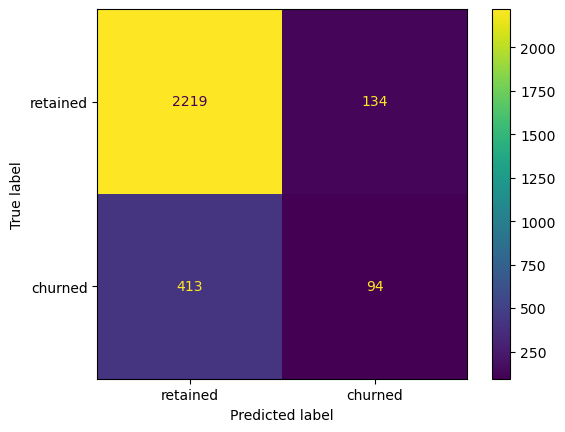

In [109]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['retained', 'churned'])
disp.plot();

**Plot feature importance**

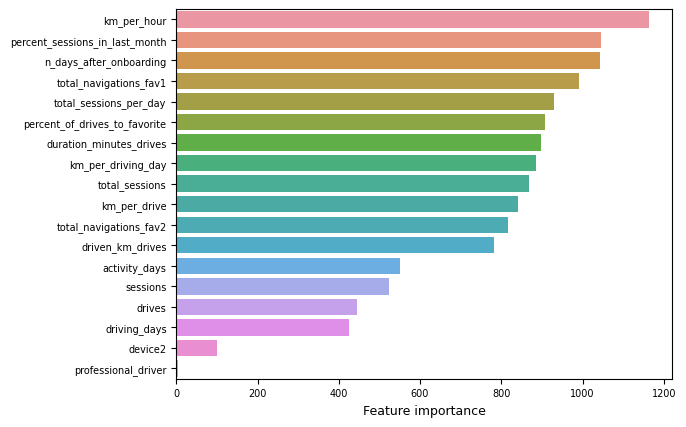

In [110]:
d = xgb_cv.best_estimator_.get_booster().get_score(importance_type='weight')
d = pd.DataFrame.from_dict(d, orient='index', columns=['feature importance weight'])
d = d.sort_values(by=['feature importance weight'], ascending=False)
#plt.figure(figsize=(15,9))
sns.barplot(data=d, x='feature importance weight', y=d.index, orient='h')
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
plt.xlabel('Feature importance', fontsize=9)
plt.show()

**Identify an optimal decision threshold**

The default decision threshold for most implementations of classification algorithms&mdash;including scikit-learn's&mdash;is 0.5. This means that, in the case of the Waze models, if they predicted that a given user had a 50% probability or greater of churning, then that user was assigned a predicted value of `1` &mdash; the user was predicted to churn.

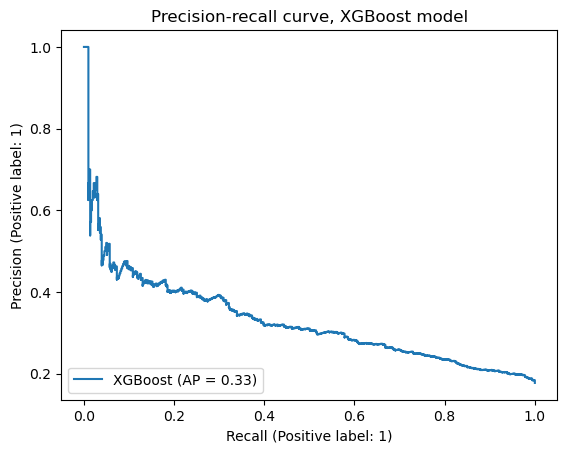

In [111]:
# Plot precision-recall curve
display = PrecisionRecallDisplay.from_estimator(
    xgb_cv.best_estimator_, X_test, y_test, name='XGBoost'
    )
plt.title('Precision-recall curve, XGBoost model');

In [112]:
def threshold_finder(y_test_data, probabilities, desired_recall):
    '''
    Find the decision threshold that most closely yields a desired recall score.

    Inputs:
        y_test_data: Array of true y values
        probabilities: The results of the `predict_proba()` model method
        desired_recall: The recall that you want the model to have

    Outputs:
        threshold: The decision threshold that most closely yields the desired recall
        recall: The exact recall score associated with `threshold`
    '''
    probs = [x[1] for x in probabilities]  # Isolate second column of `probabilities`
    thresholds = np.arange(0, 1, 0.001)    # Set a grid of 1,000 thresholds to test

    scores = []
    for threshold in thresholds:
        # Create a new array of {0, 1} predictions based on new threshold
        preds = np.array([1 if x >= threshold else 0 for x in probs])
        # Calculate recall score for that threshold
        recall = recall_score(y_test_data, preds)
        # Append the threshold and its corresponding recall score as a tuple to `scores`
        scores.append((threshold, recall))

    distances = []
    for idx, score in enumerate(scores):
        # Calculate how close each actual score is to the desired score
        distance = abs(score[1] - desired_recall)
        # Append the (index#, distance) tuple to `distances`
        distances.append((idx, distance))

    # Sort `distances` by the second value in each of its tuples (least to greatest)
    sorted_distances = sorted(distances, key=lambda x: x[1], reverse=False)
    # Identify the tuple with the actual recall closest to desired recall
    best = sorted_distances[0]
    # Isolate the index of the threshold with the closest recall score
    best_idx = best[0]
    # Retrieve the threshold and actual recall score closest to desired recall
    threshold, recall = scores[best_idx]

    return threshold, recall


In [113]:
# Get the predicted probabilities from the champion model
probabilities = xgb_cv.best_estimator_.predict_proba(X_test)

# Call the function
threshold_finder(y_test, probabilities, 0.5)

(0.171, 0.5009861932938856)

In [115]:
# Create an array of new predictions that assigns a 1 to any value >= 0.124
probs = [x[1] for x in probabilities]
new_preds = np.array([1 if x >= 0.171 else 0 for x in probs])

# Get evaluation metrics for when the threshold is 0.124
get_test_scores('XGB, threshold = 0.124', new_preds, y_test)

,model,precision,recall,F1,accuracy
0,"XGB, threshold = 0.124",0.306024,0.500986,0.379955,0.71014
